In [5]:
import tensorflow as tf
tf.__path__

_NamespacePath(['C:\\Users\\User\\anaconda3\\envs\\tf-gpu\\lib\\site-packages\\tensorflow'])

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import time
import shutil
import pickle
import random
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# from Datapreprocessing import Data
# Data = Data()
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.python.keras.models import Sequential
from tensorflow.keras import initializers
# from tensorflow.keras import regularizers
import tensorflow as tf

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import glob
import time
import shutil
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

class Data:
    def __init__(self):
        return

    def file_split(self, file):
        os.mkdir(file) # 創建資料夾
        imagelist = os.listdir('C:/Users/User/Desktop/Deep Learning/Assignment-1 Image classiication/images')
        f = open(file + '.txt') # 打開train.txt檔

        for i in range(22, 50):
            os.mkdir(file + '/' + file + str(i)) # 創建50個類別的資料夾

            for txt in f.readlines(): #逐行讀取test.txt

                for image in glob.glob('images/' + imagelist[i] + '/*.*'): # 讀取images下所有檔案

                    if (txt[17:32] == image[17:32]): # 對比txt及image名稱一不一樣

                        if '.JPEG ' in txt[17:34]: # 1位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:28] +'.JPEG', './' + file + '/'+ file + str(i))
                        elif '.JPEG' in txt[17:34]: # 2位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:29] +'.JPEG', './' + file + '/'+ file + str(i)) # 複製檔案至test目錄
                        elif '.JPE' in txt[17:34]: # 3位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:30] +'.JPEG', './' + file + '/'+ file + str(i))
                        elif '.JP' in txt[17:34]: # 4位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:31] +'.JPEG', './' + file + '/'+ file + str(i))
                        elif '.J' in txt[17:34]: # 5位數
                            shutil.copy('images/' + imagelist[i] + '/' + image[17:32] +'.JPEG', './' + file + '/'+ file + str(i))

        f.seek(0)


    def dataset_split(self, file, im_num=10000, pixel=256):
        if file == 'train':
            global  train_labels, train_images
            starttime = int(time.time())
            train_images = []
            image_list = os.listdir('train/')
            image_list.sort(key = lambda x: int(x[5:]))


            for i in range(len(image_list)):
                j = 0
                for images in glob.glob('train/' + image_list[i] + '/*'):
                    j+=1
                    if j == (im_num/50)+1 : # 只取前120張
                        break
                    img = cv2.imread(images) # 圖片讀檔
#                     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
#                     img = cv2.resize(img, (254, 254))
                    img = cv2.resize(img, (pixel, pixel))
                    train_images.append(img)

            train_images = np.array(train_images)



            train_labels = []
            image_list = os.listdir('train/')
            image_list.sort(key = lambda x: int(x[5:]))

            for i in range(len(image_list)):
                j = 0
                for labels in glob.glob('train/' + image_list[i] + '/*'):
                    j+=1
                    if j == (im_num/50)+1:
                        break
                    train_labels.append(i)
            train_labels = np.array(train_labels)

            endtime = int(time.time()) # 計時結束
            print("train_images:",train_images.shape)
            print(type(train_images))
            print("train_labels:",len(train_labels))
            print(type(train_labels))
            print('花了',endtime-starttime,'s')

            return train_images, train_labels

        elif file == 'validation':
            global validation_labels, validation_images
            starttime = int(time.time()) # 計時開始
            validation_images = []
            image_list = os.listdir('validation/')
            image_list.sort(key = lambda x: int(x[10:]))

            for i in range(len(image_list)):
                for images in glob.glob('validation/' + image_list[i] + '/*'):
                    img = cv2.imread(images) # 圖片讀檔
#                   img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
#                     img = cv2.resize(img, (254, 254))
                    img = cv2.resize(img, (pixel, pixel))
                    validation_images.append(img)

            validation_images = np.array(validation_images)



            validation_labels = []
            image_list = os.listdir('validation/')
            image_list.sort(key = lambda x: int(x[10:]))


            for i in range(len(image_list)):
                for labels in glob.glob('validation/' + image_list[i] + '/*'):
                    validation_labels.append(i)

            validation_labels = np.array(validation_labels)

            endtime = int(time.time()) # 計時結束
            print("validation_images:",validation_images.shape)
            print(type(validation_images))
            print("validation_labels:",len(validation_labels))
            print(type(validation_labels))
            print('花了',endtime-starttime,'s')

            return validation_images, validation_labels

        elif file == 'test':
            global test_labels, test_images
            starttime = int(time.time())
            # images
            test_images = []
            image_list = os.listdir('test/')
            image_list.sort(key = lambda x: int(x[4:]))

            for i in range(len(image_list)):
                for images in glob.glob('test/' + image_list[i] + '/*'):
                    img = cv2.imread(images) # 圖片讀檔
#                     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
                    img = cv2.resize(img, (pixel, pixel))
#                     img = cv2.resize(img, (256, 256))
                    test_images.append(img)

            test_images = np.array(test_images)

            # labels
            test_labels = []
            image_list = os.listdir('test/')
            image_list.sort(key = lambda x: int(x[4:]))


            for i in range(len(image_list)):
                for labels in glob.glob('test/' + image_list[i] + '/*'):
                    test_labels.append(i)

            test_labels = np.array(test_labels)
            endtime = int(time.time())

            print("test_images:",test_images.shape)
            print(type(test_images))
            print("test_labels:",len(test_labels))
            print(type(test_labels))
            print('花了',endtime-starttime,'s')

            return test_images, test_labels


In [23]:
Data().dataset_split(file = 'train', im_num = 20000, pixel=512)
Data().dataset_split('validation')
Data().dataset_split('test')


train_images: (20000, 256, 256, 3)
<class 'numpy.ndarray'>
train_labels: 20000
<class 'numpy.ndarray'>
花了 20 s
validation_images: (450, 256, 256, 3)
<class 'numpy.ndarray'>
validation_labels: 450
<class 'numpy.ndarray'>
花了 1 s
test_images: (450, 254, 254, 3)
<class 'numpy.ndarray'>
test_labels: 450
<class 'numpy.ndarray'>
花了 0 s


(array([[[[ 97, 231, 185],
          [ 95, 229, 183],
          [ 94, 228, 182],
          ...,
          [ 72, 216, 163],
          [ 72, 218, 164],
          [ 71, 219, 165]],
 
         [[ 97, 231, 185],
          [ 95, 229, 183],
          [ 95, 229, 183],
          ...,
          [ 72, 216, 163],
          [ 71, 217, 163],
          [ 70, 218, 164]],
 
         [[ 97, 231, 185],
          [ 96, 230, 184],
          [ 95, 228, 183],
          ...,
          [ 71, 215, 162],
          [ 70, 216, 162],
          [ 68, 216, 162]],
 
         ...,
 
         [[ 20,  64,  87],
          [ 24,  70,  92],
          [ 12,  63,  86],
          ...,
          [ 66, 213, 165],
          [ 67, 219, 173],
          [ 66, 221, 180]],
 
         [[ 25,  73,  95],
          [ 27,  76,  99],
          [ 14,  69,  92],
          ...,
          [ 62, 210, 161],
          [ 65, 218, 170],
          [ 68, 226, 181]],
 
         [[ 24,  73,  95],
          [ 30,  81, 104],
          [ 23,  80, 102],
   

In [24]:
starttime = int(time.time())
train_images = train_images - np.mean(test_images)
train_images = train_images/np.std(train_images)
endtime = int(time.time())
print('train_images花了',endtime-starttime,'s')
starttime = int(time.time())
validation_images = validation_images - np.mean(validation_images)
validation_images = validation_images/np.std(validation_images)
endtime = int(time.time())
print('validation_images花了',endtime-starttime,'s')
starttime = int(time.time())
test_images = test_images - np.mean(test_images)
test_images = test_images/np.std(test_images)
endtime = int(time.time())
print('test_images花了',endtime-starttime,'s')

train_images花了 29 s
validation_images花了 2 s
test_images花了 0 s


In [37]:
model = Sequential()

model.add(Conv2D(6,(3,3),activation='relu', input_shape=(256,256,3),kernel_initializer = initializers.HeNormal()))
model.add(Conv2D(10,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(.4))
model.add(Conv2D(10,(3,3),activation='relu'))
model.add(Conv2D(10,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(.4))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Dropout(.4))
model.add(Conv2D(50,(2,2),activation='relu'))
model.add(Dropout(.4))
model.add(GlobalAveragePooling2D())
model.add(Dense(1200,activation='relu'))
model.add(Dense(840,activation='relu'))
model.add(Dense(640,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(50,activation='softmax'))

# opt = tf.python.keras.optimizer_v2.adam(
#     learning_rate=1e-5)
# loss = tf.python.keras.losses.SparseCategoricalCrossentropy()
loss = tf.keras.losses.SparseCategoricalCrossentropy()


model.compile(optimizer = 'Adam',
            loss = loss,
            metrics=['accuracy'])

model.summary() #輸出訓練模型


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 254, 254, 6)       168       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 252, 252, 10)      550       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 126, 126, 10)      0         
_________________________________________________________________
module_wrapper_38 (ModuleWra (None, 126, 126, 10)      0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 124, 124, 10)      910       
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 122, 122, 10)      910       
_________________________________________________________________
module_wrapper_39 (ModuleWra (None, 122, 122, 10)    

In [30]:
Assignment_3 = model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels ), epochs=50, batch_size=8)

Epoch 1/50
2500/2500 [==============================] - 152s 61ms/step - loss: 3.7340 - accuracy: 0.0445 - val_loss: 3.8484 - val_accuracy: 0.0289
Epoch 2/50
2500/2500 [==============================] - 149s 60ms/step - loss: 3.5305 - accuracy: 0.0704 - val_loss: 3.6268 - val_accuracy: 0.0511
Epoch 3/50
2500/2500 [==============================] - 150s 60ms/step - loss: 3.4232 - accuracy: 0.0918 - val_loss: 3.5922 - val_accuracy: 0.0711
Epoch 4/50
2500/2500 [==============================] - 150s 60ms/step - loss: 3.3396 - accuracy: 0.1074 - val_loss: 3.7184 - val_accuracy: 0.0600
Epoch 5/50
2500/2500 [==============================] - 151s 60ms/step - loss: 3.2766 - accuracy: 0.1155 - val_loss: 3.4583 - val_accuracy: 0.0800
Epoch 6/50
2500/2500 [==============================] - 152s 61ms/step - loss: 3.2152 - accuracy: 0.1282 - val_loss: 3.4620 - val_accuracy: 0.0956
Epoch 7/50
2500/2500 [==============================] - 151s 61ms/step - loss: 3.1609 - accuracy: 0.1336 - val_loss: 3

In [38]:
Assignment_3 = model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels ), epochs=30, batch_size=8)

Epoch 1/30
2500/2500 [==============================] - 370s 148ms/step - loss: 3.8544 - accuracy: 0.0322 - val_loss: 3.8224 - val_accuracy: 0.0400
Epoch 2/30
2500/2500 [==============================] - 366s 146ms/step - loss: 3.7936 - accuracy: 0.0375 - val_loss: 3.8141 - val_accuracy: 0.0400
Epoch 3/30
2500/2500 [==============================] - 364s 146ms/step - loss: 3.6904 - accuracy: 0.0529 - val_loss: 3.6152 - val_accuracy: 0.0622
Epoch 4/30
2500/2500 [==============================] - 367s 147ms/step - loss: 3.5235 - accuracy: 0.0736 - val_loss: 3.5887 - val_accuracy: 0.0800
Epoch 5/30
2500/2500 [==============================] - 369s 148ms/step - loss: 3.4294 - accuracy: 0.0918 - val_loss: 3.4252 - val_accuracy: 0.0933
Epoch 6/30
2500/2500 [==============================] - 369s 148ms/step - loss: 3.3726 - accuracy: 0.1006 - val_loss: 3.3956 - val_accuracy: 0.0911
Epoch 7/30
2500/2500 [==============================] - 370s 148ms/step - loss: 3.3151 - accuracy: 0.1125 - val_

In [39]:
# train
Assignment_3 = model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels ), epochs=300, batch_size=8)

Epoch 1/300
2500/2500 [==============================] - 338s 135ms/step - loss: 2.7893 - accuracy: 0.2245 - val_loss: 2.9784 - val_accuracy: 0.1911
Epoch 2/300
2500/2500 [==============================] - 336s 134ms/step - loss: 2.7771 - accuracy: 0.2274 - val_loss: 2.9752 - val_accuracy: 0.2089
Epoch 3/300
2500/2500 [==============================] - 336s 134ms/step - loss: 2.7551 - accuracy: 0.2297 - val_loss: 2.9902 - val_accuracy: 0.2178
Epoch 4/300
2500/2500 [==============================] - 336s 134ms/step - loss: 2.7586 - accuracy: 0.2285 - val_loss: 3.1645 - val_accuracy: 0.1756
Epoch 5/300
2500/2500 [==============================] - 338s 135ms/step - loss: 2.7501 - accuracy: 0.2325 - val_loss: 3.0091 - val_accuracy: 0.1911
Epoch 6/300
2500/2500 [==============================] - 360s 144ms/step - loss: 2.7462 - accuracy: 0.2341 - val_loss: 3.0170 - val_accuracy: 0.1711
Epoch 7/300
2500/2500 [==============================] - 367s 147ms/step - loss: 2.7368 - accuracy: 0.2340

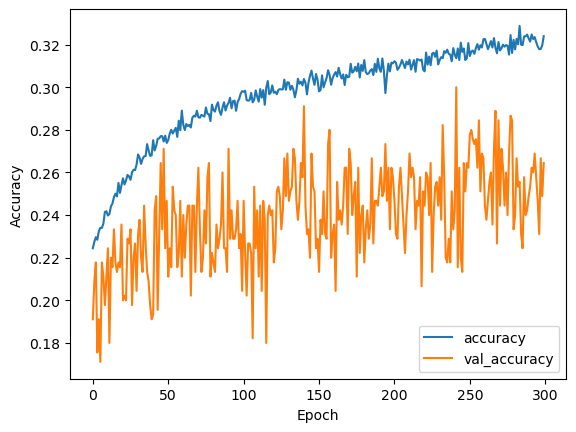

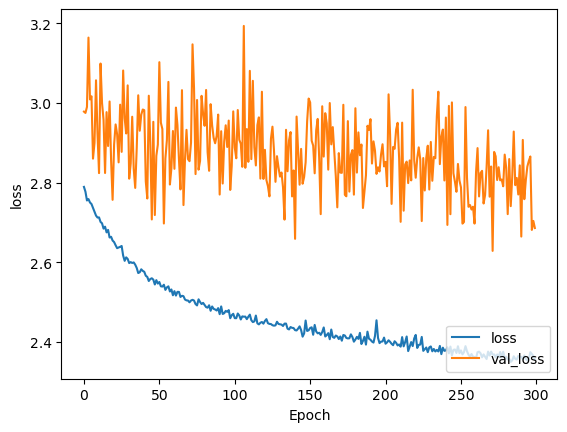

15/15 - 2s - loss: 2.6118 - accuracy: 0.2667
損失值: 2.611841917037964 精準度: 0.2666666805744171


In [41]:
plt.plot(Assignment_3.history['accuracy'],label='accuracy')
plt.plot(Assignment_3.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5,1])
plt.legend(loc='lower right')
plt.show()

plt.plot(Assignment_3.history['loss'],label='loss')
plt.plot(Assignment_3.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0.5,1])
plt.legend(loc='lower right')
plt.show()

test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('損失值:',test_loss,'精準度:',test_acc)

In [44]:
# train_loss,train_acc=model.evaluate(train_images,train_labels,verbose=2)
# print('train損失值:',train_loss,'train精準度:',train_acc)

validation_loss,validation_acc=model.evaluate(validation_images,validation_labels,verbose=2)
print('validation損失值:',validation_loss,'validation精準度:',validation_acc)

# test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
# print('test損失值:',test_loss,'test精準度:',test_acc)

15/15 - 2s - loss: 2.6859 - accuracy: 0.2644
validation損失值: 2.685920238494873 validation精準度: 0.2644444406032562


In [43]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('test損失值:',test_loss,'test精準度:',test_acc)

15/15 - 1s - loss: 2.6118 - accuracy: 0.2667
test損失值: 2.611841917037964 test精準度: 0.2666666805744171


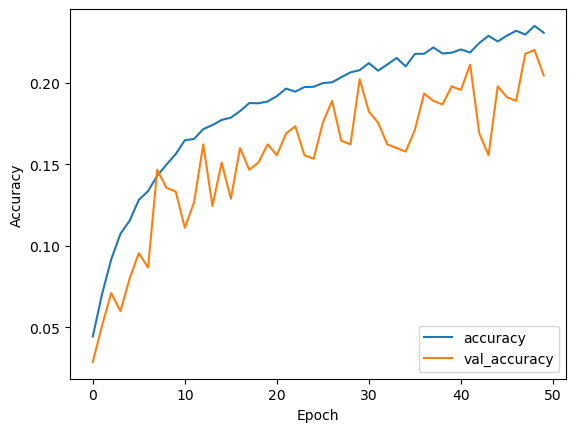

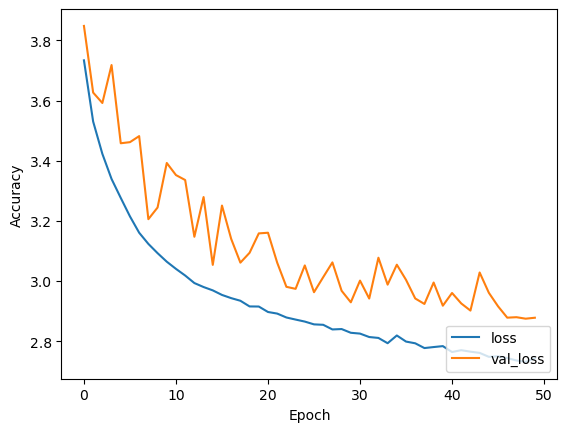

15/15 - 1s - loss: 2.9387 - accuracy: 0.1978
損失值: 2.938685894012451 精準度: 0.19777777791023254


In [31]:
plt.plot(Assignment_3.history['accuracy'],label='accuracy')
plt.plot(Assignment_3.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(Assignment_3.history['loss'],label='loss')
plt.plot(Assignment_3.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('損失值:',test_loss,'精準度:',test_acc)